# The Sparks Foundation

# Data Science & Business Analytics Internship

## Task 2: Prediction using Unsupervised ML

### This task focuses on the ‘Iris’ dataset, and predicts the optimum number of clusters and represents it visually. For the catagorization, K-Means Algorithm was employed

#### Based on Data Source: https://bit.ly/3kXTdox

### demonstrated and performed by : Anurag Sen | sen1anurag@gmail.com

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [202]:
#Reading the dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [203]:
data = iris_df.iloc[:,:].values
#data

### <u>Predicting the value of K (optimum number of clusters) for the model-</u>

In [204]:
from sklearn.cluster import KMeans

k_range = range(1,12)
sse = [] #Sum of squares of error, the cumulative of the distances of each point in a cluster from their respective centroid

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(iris_df)
    sum_of_squares = km.inertia_
    sse.append(sum_of_squares)
    
print("Sum of square values from K = 1 to 11 are as followed-")
sse

Sum of square values from K = 1 to 11 are as followed-


[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.46465384615385,
 39.03998724608725,
 34.573030827867775,
 30.112388528138535,
 28.136194289198947,
 25.96411853162319,
 24.59954598729445]

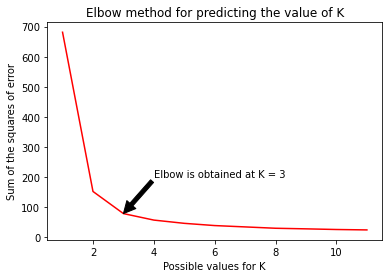

In [205]:
plt.title("Elbow method for predicting the value of K")
plt.xlabel("Possible values for K")
plt.ylabel("Sum of the squares of error")
plt.annotate('Elbow is obtained at K = 3',xytext=(4,200),xy=(3,78.851441426146),arrowprops={'facecolor':'black'})
plt.plot(k_range,sse,color='r')

<u> thus, value of K here is 3. So, the optimum number of clusters for this model is 3.</u>

### * <u>Training the model for K = 3 </u>

In [206]:
Kmean = KMeans(n_clusters = 3)
ypredict = Kmean.fit_predict(iris_df)
ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [207]:
iris_df['Cluster'] = ypredict
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### <u>Observing the clusters on sepal length and sepal width-</u>

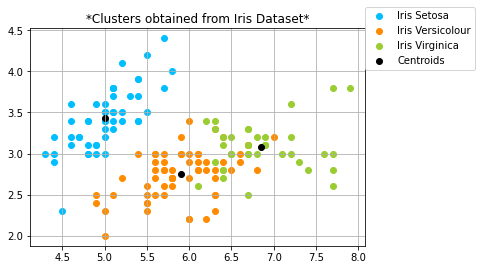

In [208]:
plt.title("*Clusters obtained from Iris Dataset*")
plt.scatter(data[ypredict == 0, 0], data[ypredict == 0, 1], color = 'deepskyblue', label = 'Iris Setosa')
plt.scatter(data[ypredict == 1, 0], data[ypredict == 1, 1], color = 'darkorange', label = 'Iris Versicolour')
plt.scatter(data[ypredict == 2, 0], data[ypredict == 2, 1], color = 'yellowgreen', label = 'Iris Virginica')
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:,1], color = 'black', label = 'Centroids')
plt.legend(loc=(1, 0.81))
plt.grid()